## Wine Data Clustering ML Model

loading wine dataset from sklearn

In [30]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


summary stats

In [31]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.iloc[:,:3].describe())

          alcohol  malic_acid         ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000


no missing values. i'll scale the data later since attributes aren't on the same scale<br>
plotting for better view

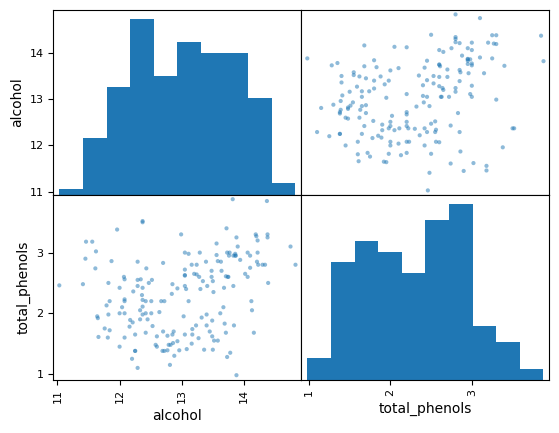

In [32]:
import matplotlib.pyplot as plt
import numpy as numpy 
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

there seem to be 3 subgroups<br>
### pre-processing: standadization
picking 2 features: alcohol and total_phenols<br>
standadization data to scale data: z = (x-mean)/std<br>
here, z is scaled x which is centered at 0 with unit std

In [33]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

print(scale.mean_)
print(scale.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [34]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

X_scaled = scale.transform(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


for more details: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

### k-means Modeling


In [35]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 1 0 1 0 2 1 2 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


inspecting coordinates  of 3 centroids

In [36]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)


from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)

print(kmeans.cluster_centers_)

[[-1.06183503  0.08414606]
 [ 0.92017418  0.87087204]
 [ 0.05253603 -1.14020926]]


visualizing (stars are centroids)

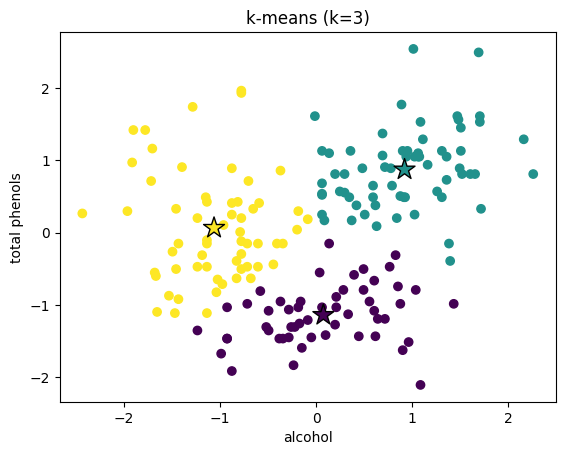

In [37]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
y_pred = kmeans.predict(X_scaled)

import matplotlib.pyplot as plt
# plot the scaled data
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="*", s = 250, c = [0,1,2],
edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

for new data: 13 alcohol and 2.5 phenols

In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
kmeans.predict(X_scaled)

X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)

print(kmeans.predict(X_new_scaled))

[1]


c:\Users\Dilshan (dp)\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Optimal k: The Elbow Method
finding optimal k for better clustering<br>
when k=2, distortion (inertia)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

185.25081541190127


when k=3, distortion (inertia)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

114.37290289645739


plotting inertia vs k

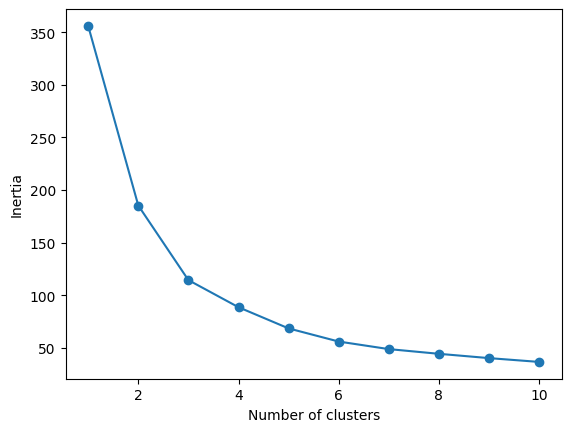

In [41]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine[['alcohol', 'total_phenols']] 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

from sklearn.cluster import KMeans
# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

optimal k at point when inertia decrement rate slows down. k = 3 (elbow-method)

### Rebuilding for 3 features
finding optimal k

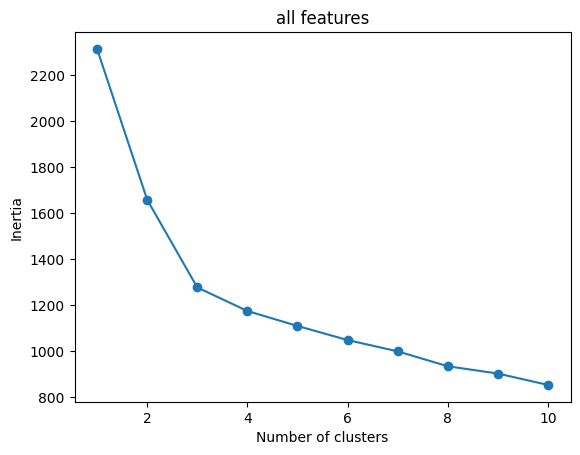

In [42]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine 

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

from sklearn.cluster import KMeans
# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i 
        )
    km.fit(X_scaled) 
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all features")
plt.show()

k=3<br>
finalizing the model

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

X = wine 

scale = StandardScaler() 
scale.fit(X)

X_scaled = scale.transform(X) 

kmeans = KMeans(3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


only 13/178 wines are clustered differently in 2 models